In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn import datasets
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('./data/data/bostonhousing.csv')

df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [8]:
data = np.float32(df)

xdataN = data[:,:-1]
ydataN = data[:,[-1]]

scale = preprocessing.MinMaxScaler() ## MIN&&MAX Normalization
dataN = scale.fit_transform(data)

xdata = dataN[:,:-1]
ydata = dataN[:,[-1]]

x = tf.placeholder(tf.float32 , shape = [None,13])
y = tf.constant(ydata , tf.float32)

w = tf.Variable(tf.random_uniform([13,1]))
b = tf.Variable(tf.random_uniform([1]))

hx = tf.matmul(x,w) + b
cost = tf.reduce_mean( tf.square(hx-y))

optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(cost)
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for i in range(50001):
    sess.run(train,{x:xdata})
    if i%10000 == 0 :
        print(i,sess.run(cost,{x:xdata}))

sess.run(w)

sess.run(b)

AttributeError: module 'tensorflow' has no attribute 'placeholder'

NameError: name 'sess' is not defined

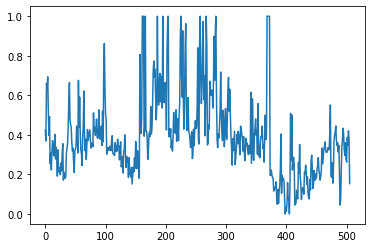

In [5]:
plt.plot(ydata)
plt.plot(sess.run(hx,{x:xdata}),'r--')
plt.show()

arr = scale.transform([[0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,None]])
arr[:,:-1]

float(sess.run(hx, {x:arr[:,:-1]}))

labelScale = preprocessing.MinMaxScaler()
y1 = labelScale.fit_transform(data[:,[-1]])

labelScale.inverse_transform([[0.5556207299232483]])

float(labelScale.inverse_transform([[0.5556207299232483]]))

In [ ]:
A = np.zeros((31,1))
A = np.float32(A)
A

for i in range(0,31):
    if float(ydataN[i,0]) > 40 :
        A[i,0] = 3
    elif float(ydataN[i,0]) >30 and float(ydataN[i,0]) <= 40 :
        A[i,0] = 2
    else:
        A[i,0] = 1

A

B = tf.concat([ydataN,A],axis=1)
B
sess.run(B)

C = tf.concat([xdataN,B],axis=1)
C
sess.run(C)

D = np.float32(C)

data = D
dataframe = pd.DataFrame(data)
dataframe.to_csv('./data/aasdf.csv', header = True, index = False)

dataframe.columns = ['Girth','Height','정도']

df1 = dataframe
df1

